In [77]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
from math import *

In [78]:
mu = 0
mu2 = 0.5
mu3 = 0.75

In [79]:
variance = 0.5
variance2 = 1
variance3 = 1.5


In [80]:
sigma = math.sqrt(variance)
sigma2 = math.sqrt(variance2)
sigma3 = math.sqrt(variance3)


In [81]:
x = np.linspace(mu-3*variance,mu+3*variance, 40)
x2 = np.linspace(mu2-3*variance2, mu+3*variance2, 40)
x3 = np.linspace(mu2-3*variance3, mu+3*variance3, 40)


In [82]:
A = np.zeros((559,1))
A[20:60] = mlab.normpdf(x, mu, sigma).reshape(40,1)
A[230:270] = mlab.normpdf(x2, mu2, sigma2).reshape(40,1)
A[420:460] = mlab.normpdf(x3, mu3, sigma3).reshape(40,1)
A = A.reshape(559)


In [83]:
B = np.zeros((559,1))
B[23:63] = mlab.normpdf(x, mu, sigma).reshape(40,1)
B[400:440] =  mlab.normpdf(x3, mu3, sigma3).reshape(40,1)
B[470:510] = mlab.normpdf(x2, mu2, sigma2).reshape(40,1)
B = B.reshape(559)


In [84]:
C = np.zeros((559, 1))
C[320:360] = mlab.normpdf(x2, mu2, sigma2).reshape(40,1)
C[433:473] = mlab.normpdf(x, mu, sigma).reshape(40,1)
C[128:168] = mlab.normpdf(x3, mu3, sigma3).reshape(40,1)
C = C.reshape(559)

In [85]:
spectralmatrix = np.zeros((256, 256, 559))
functionalmatrix = np.zeros((256, 256))
Amatrix = np.zeros((256, 256))
Bmatrix = np.zeros((256, 256))
Cmatrix =np.zeros((256, 256))
xaxis = spectralmatrix.shape[0]
yaxis = spectralmatrix.shape[1]


In [86]:
#generating random coefficients
#creating a matrix with a spectrum at each point

np.random.seed(122)
a=np.random.rand(1)
b=np.random.rand(1)
c=np.random.rand(1)
spatialfrequency = (2*np.pi)/64
for x in range(xaxis):
    for y in range(yaxis):
        a = abs(np.sin(y*spatialfrequency))
        b = abs(np.sin(x*spatialfrequency) + np.sin(y*spatialfrequency))
        c = np.sin(x*spatialfrequency)**2
    #can make a, b, c as a function of x and y with some random noise
        spectralmatrix[x,y,:] = a*A + b*B + c*C
        functionalmatrix[x][y] = sin(a)*a + cos(b)*b + sin(a)*sin(c)*c
        Amatrix[x][y]=a
        Bmatrix[x][y]=b
        Cmatrix[x][y]=c

In [87]:
yactual=functionalmatrix
yactual

array([[ 0.        ,  0.10713866,  0.22920875, ...,  0.36122661,
         0.22920875,  0.10713866],
       [ 0.09754667,  0.2018806 ,  0.31844378, ...,  0.27183786,
         0.13445333,  0.00960102],
       [ 0.19138949,  0.29034033,  0.39895482, ...,  0.17826461,
         0.03810001,  0.10634988],
       ..., 
       [ 0.27813987,  0.19901074,  0.13395748, ...,  0.57056006,
         0.46850834,  0.36968008],
       [ 0.19138949,  0.10634988,  0.03810001, ...,  0.51281547,
         0.39895482,  0.29034033],
       [ 0.09754667,  0.00960102,  0.13445333, ...,  0.4425072 ,
         0.31844378,  0.2018806 ]])

In [88]:
B1 = np.zeros((256, 256))
B2 = np.zeros((256, 256))
B3 =np.zeros((256, 256))

In [89]:
#creating a linear relating between the three matrices
#pts=256
p=Amatrix
q=Bmatrix
r=Cmatrix
B0=0
for x in range(xaxis):
    for y in range(yaxis):
        a = abs(np.sin(y*spatialfrequency))
        b = abs(np.sin(x*spatialfrequency) + np.sin(y*spatialfrequency))
        c = np.sin(x*spatialfrequency)**2
        #can make a, b, c as a function of x and y with some random noise
        #spectralmatrix[x,y,:] = a*A + b*B + c*C
        #functionalmatrix[x][y] = sin(a)*a + cos(b)*b + sin(a)*sin(c)*c
        B1[x][y]=sin(a)
        B2[x][y]=cos(b)
        B3[x][y]=sin(c)*cos(c)
        yactual1=B0+B1*p+B2*q+B3*r

In [90]:
yactual1.shape

(256, 256)

In [91]:
# reshaping and concatenating the matrices for linear regression
p=p.reshape(65536,1)
q=q.reshape(65536,1)
r=r.reshape(65536,1)
yactual1=yactual1.reshape(65536,1)
x1=np.concatenate((p,q), axis=1)
x=np.concatenate((x1,r), axis=1)
x.shape,yactual1.shape

((65536, 3), (65536, 1))

In [92]:
#performing the linear regression
regr=linear_model.LinearRegression()
s=regr.fit(x, yactual1)
s.coef_, s.intercept_

(array([[ 0.54827363, -0.12376151,  0.15860529]]), array([ 0.56188475]))

***SVR USING A NON LINEAR KERNEL***

In [93]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [94]:
yactual1=np.ravel(yactual1)#flattening to a column vector from a 1d array

In [95]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [96]:
y_rbf = svr_rbf.fit(x, yactual1).predict(x)
x.size, yactual1.size
x2=np.array(x)
yactual1=np.array(yactual1)
x2.resize(65536)
x2.size, yactual1.size

(65536, 65536)

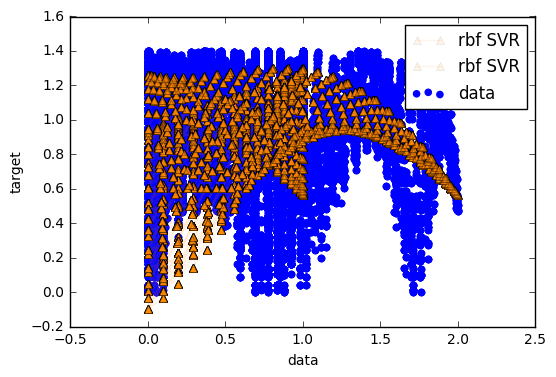

In [97]:
plt.scatter(x2,yactual1, color='b', lw=1, label='data')
plt.hold('on')
plt.plot(x1, y_rbf, color='darkorange', label='rbf SVR', marker='^', alpha=0.09)
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()

***support vectors are the points closest to the decision boundary***

In [98]:
#this attribute gives the support vectors
support_y_rbf = svr_rbf.fit(x, yactual1).support_vectors_
#support_y_rbf

In [99]:
#this attribute gives the coefficient of the support vector in the decision function
suppcoef_y_rbf = svr_rbf.fit(x, yactual1).dual_coef_
suppcoef_y_rbf

array([[-28.99259357,  17.46737148,  -6.41097626,  -6.31750867,
          7.77751721,  29.71219619, -15.29997984,  19.39504832,
        -17.33107486]])

In [100]:
#returns the constants of the decision function
intercept_y_rbf = svr_rbf.fit(x, yactual1).intercept_
intercept_y_rbf

array([ 0.37769807])

In [101]:
x.size, yactual1.size

(196608, 65536)

In [102]:
x=np.array(x)

In [103]:
x.resize(65536)
x.size, yactual1.size

(65536, 65536)